In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import statsmodels.formula.api as smf
import math
import statsmodels.formula.api as sm

In [4]:
data = pd.read_csv('data.csv', sep=';')

## Background / Motivation

Term deposit is a fix-term investment that includes the deposit of money into an account at a financial institution. It is very important to a commercial bank’s operation because the bank makes a profit by lending the funds held in term deposit for a higher interest rate than the rate it pays on the time deposits, and a healthy amount of term deposit will allow the bank to have a healthy cash flow and thus better operation. As a result, increasing clients’ likelihood to subscribe to term deposits is key to increasing the bank’s revenue.  

## Problem statement 

Therefore, We are interested in predicting whether the client would subscribe to the term-deposit in a Portuguese bank based on the direct marketing campaign information. More specifically, we will explore the client’s demographics such as job, marital status, education, balance, housing, contact dates, as well as other previous marketing efforts and their association with clients’ decision to subscribe to term deposit. We hope to determine whether the marketing campaign is effective and to what degree each factor impacts the marketing effectiveness. This is a classification problem because there are two non continuous, categorical results - yes or no (deposit). Therefore, when making the model, we basically splitted the responses into two groups, clients that did subscribe to term deposit and the clients that didn’t. This is a prediction problem as we are interested in predicting whether a client would subscribe to the term deposit based on marketing campaign information and demographic information.

## Data sources
We will use the Bank Marketing dataset from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing This data set includes 4119 observations of telemarketing campaigns of a Portuguese banking institution. The attributes include 21 variables such as client data, information of the last contact of the current campaign, and social and economic context attributes. The outcome variable is whether or not the client has subscribed a term deposit. This data source will help us answer the question because it provides client demographic and financial information and campaign contact history, which could provide critical information for the targeted audience and marketing strategy that could maximize the success rate of telemarketing.

## Stakeholders
Stakeholders of the project include the observed banking institutions, which can use the findings for the purpose of internal auditing, improving future marketing strategies, and tailoring banking products to their target audiences. The insights of the marketing campaign can help the observed banking institution to achieve their goals of providing suitable services to its customers, maximize cost-effectiveness in marketing, and improve financial inclusion for the community. The result can also benefit other institutions in the banking industry and social scientists studying economics, finance, and marketing. It can shed light to people’s behavior in phone call campaigns and financial decisions. 


## Data quality check / cleaning / preparation 



**There are three steps for data prearation:**

**(1) Dropping Missing Values**

**(2) Merging the entries in catogroical variables**

**(3) Resampling the imbalanced dataset through SMOTE**

**(4) Eliminating the multicollinearity issue through checking VIF**

In [5]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
cat_columns = data.select_dtypes(include=['object']).columns

# Loop through each categorical column and print the value counts
for col in cat_columns:
    print(f"Value counts for {col}:")
    print(data[col].value_counts())
    print()

Value counts for job:
admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64

Value counts for marital:
married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64

Value counts for education:
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: education, dtype: int64

Value counts for default:
no         3315
unknown     803
yes           1
Name: default, dtype: int64

Value counts for housing:
yes        2175
no         1839
unknown     105
Name: housing, dtype: int64

Value counts for loan:
no         3349
yes         665
unknown     105
Name: 

(1) There is no missing values for numeric variables. Even though the dataset does not have any direct missing values (shown as NA) for catogorical variables, it still contains many missing values in the form of “UNKNOWN”. Thus, we still need to deal with the missing data. Generally, we drop the variables if they have more than 40% of unknown data. On the other hand, since there are very small proportions of observation with unknown data, and most of them have more than 2 missing values. Thus, we just decided to drop these rows.

(2) We binned some of the categorical data based on our domain knowledge when there are too many mergeable entries in this variable. For example, after merging, the variable “education” will only have three levels of entry: ‘Primary', 'Secondary', and 'Tertiary'.

Text(0.5, 1.0, 'Has the client subscribed a term deposit?')

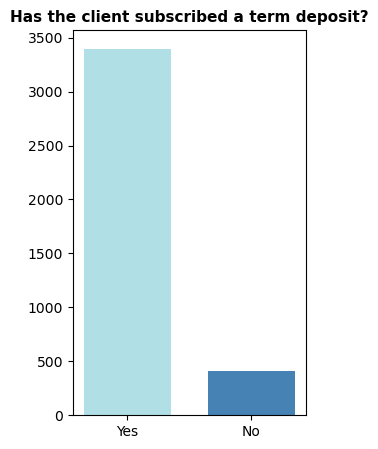

In [18]:
Subscription = {'Yes':3398, 'No':413}
YN = list(Subscription.keys())
Counts = list(Subscription.values())
  
fig = plt.figure(figsize = (3, 5))

# creating the bar plot
plt.bar(YN, Counts, color = ['powderblue', 'steelblue'], width = 0.7)
 
plt.title("Has the client subscribed a term deposit?",fontdict={'fontsize': '11', 'fontweight' : 'bold'})

Text(0.5, 1.0, 'Has the client subscribed a term deposit? (SMOTE)')

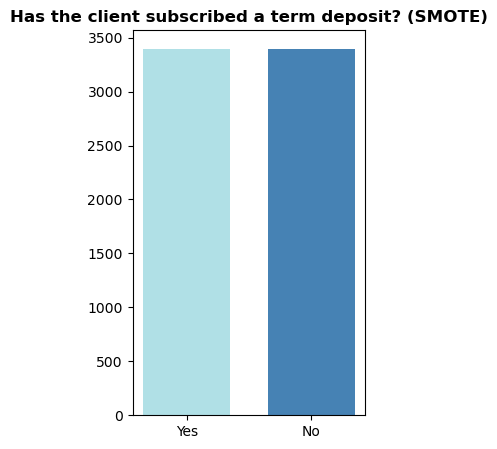

In [19]:
Subscription = {'Yes':3398, 'No':3398}
YN = list(Subscription.keys())
Counts = list(Subscription.values())
  
fig = plt.figure(figsize = (3, 5))

# creating the bar plot
plt.bar(YN, Counts, color = ['powderblue', 'steelblue'], width = 0.7)
 
plt.title("Has the client subscribed a term deposit? (SMOTE)",fontdict={'fontsize': '12', 'fontweight' : 'bold'})

(3) Since the dataset is extremely imbalanced. Those clients who successfully subscribe the term deposit is only about 10 percent of the whole dataset. Thus, we decided to apply Synthetic Minority Oversampling Technique (SMOTE) to fix the problem on training data. SMOTE helps to create the synthetic data for the minority group based on the K-nearest neighbor algorithm. The modified sample has a balanced distribution between “YES” and “NO”.

(4) When using VIF analysis to avoid the multicollinearity issues, we dropped one variable "nr_employed" to make all the variables with VIF value lower than 10. The variable dropped seems to have a strong correlation with "euribor3m", which is a very good predictor for our model.

## Exploratory data analysis

After data cleaning, we proceeded to EDA, which helped us visualize the relationship between each predictor and subscription rate. 

We looked at age, number of contacts before the campaign and during the campaign, with the client, Euribor (Euro Interbank Offered Rate: average interest rates at which a large panel of European banks borrow), and consumer confidence index. These variables are continuous variables. Before creating the plots, we first binned them (i.e. create bins). For instance, age is continuous and it’s binned into 4 such that the number of elements in each bin is as equal as possible. Once we bin it, we plot the frequency of the underlying value in the bin.

We illustrated the relationships between these numerical variables with the response variable (subscription = “Yes” or “No”) with the heatmap, bar plots, scatterplots, and line plots. This provided us critical insights to incorporate into our model. For example, we created a frequency plot for the variable “previous”, which is the number of contacts performed before this campaign and for this client. Looking at the visualization for previous contact, we realized the relationship between previous contact and subscription rate is roughly quadratic. Specifically, the number of previous contacts has a positive relationship with successful subscription until about 8 contacts, after which subscription rate will start to decrease. This makes sense intuitively because previous contacts help improve familiarity between the banks and the clients. Yet, when the banks try to contact the clients too frequently, the client may view contacts as disturbing, which makes them less likely to want to subscribe to the term deposit. We incorporated the quadratic transformation of “previous contact” in our model 1, which turned out to improve model accuracy. 

Another transformation we included was a log transformation on “campaign”. Campaign is the number of contacts performed during this campaign and for this client.  Looking at the frequency plot, we realized that the relationship between campaign and subscription rate roughly presents a log relationship. This inspired us to include the log transformation of “campaign” into our mode. Lastly, looking at the plot on “cons_conf_idx”, which is the “consumer confidence index, we experimented with a log transformation on the variable. This helped improve our model accuracy. 
For categorical variables, we found that “day_of_week”, “education”, “marital status”, “month”, and “poutcome” were largely correlated with subscription rate. In particular,  “poutcome”, the outcome of the previous marketing campaign has a significant relationship with subscription rate. The subscription rate is much higher when the previous outcome was successful compared to when it’s failure or nonexistent. Therefore, we decided to bind failure and nonexistent observations from successful ones. This helped distinguish clients with successful previous outcomes. This transformation of the variable significantly helped our model. We also included other categorical variables mentioned above in our model as they exhibited significant relationships with our outcome variable. 

Overall economic and social environment is important to clients’ financial decisions as consumer confidence index, Euribor, and month all play an important role in our model.



## Approach

What kind of a model (linear / logistic / other) did you use? What performance metric(s) did you optimize and why?

Is there anything unorthodox / new in your approach? 

What problems did you anticipate? What problems did you encounter? Did the very first model you tried work? 

Did your problem already have solution(s) (posted on Kaggle or elsewhere). If yes, then how did you build upon those solutions, what did you do differently? Is your model better as compared to those solutions in terms of prediction / inference?

**Important: Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.**

## Developing the model

Explain the steps taken to develop and improve the base model - informative visualizations / addressing modeling assumption violations / variable transformation / interactions / outlier treatment / influential points treatment / addressing over-fitting / addressing multicollinearity / variable selection - stepwise regression, lasso, ridge regression). 

Did you succeed in achieving your goal, or did you fail? Why?

**Put the final model equation**.

**Important: This section should be rigorous and thorough. Present detailed information about decision you made, why you made them, and any evidence/experimentation to back them up.**

## Limitations of the model with regard to inference / prediction

The biggest limitation of our model is that the dataset is outdated. The dataset is collected from May 2008 to November 2010, which is a decade ago. And for now, instead of using telephones, many of the banks will use apps or Tik Tok for attracting clients. The marketing strategy has completely changed over the past 10 years. 

However, our model still has its power due to the following two reasons: 

（1）The process of building our model can be useful for banks. When they have the updated demographic information, they can re-do the process and have an updated model that is not obsolete. 

（2）Even though this is a prediction model, the inference can be derived from the statistical significance of different variables. For instance, euribor 3 month rate is a very important predictor for classification. When the banks are trying to market their term deposit, the social and economic environment should not be ignored. 


## Conclusions and Recommendations to stakeholder(s)

What conclusions do you draw based on your model? If it is inference you may draw conclusions based on the coefficients, statistical significance of predictors / interactions, etc. If it is prediction, you may draw conclusions based on prediction accuracy, or other performance metrics.

How do you use those conclusions to come up with meaningful recommendations for stakeholders? The recommendations must be action-items for stakeholders that they can directly implement without any further analysis. Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

If your recommendations are not practically implementable by stakeholders, how will they help them? Is there some additional data / analysis / domain expertise you need to do to make the recommendations implementable? 

Do the stakeholder(s) need to be aware about some limitations of your model? Is your model only good for one-time use, or is it possible to update your model at a certain frequency (based on recent data) to keep using it in the future? If it can be used in the future, then for how far into the future?

## GitHub and individual contribution {-}

Put the **Github link** for the project repository.

Add details of each team member's contribution in the table below.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 50%;">
       <col span="1" style="width: 15%;"> 
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Contributed aspects</th>
    <th>Details</th>
    <th>Number of GitHub commits</th>
  </tr>
  <tr>
    <td>Yide Cui</td>
    <td>Data cleaning and Dataset resampling </td>
    <td>Cleaned data to impute missing values, re-categorized the entries of categorical data, oversampled the minority class for balancing the dataset.</td>
    <td>15</td>
  </tr>
  <tr>
    <td>Carrie Zeng</td>
    <td>Assumptions and interactions</td>
    <td>Checked and addressed modeling assumptions and identified relevant variable interactions.</td>
    <td>120</td>
  </tr>
    <tr>
    <td>Angelica Wang</td>
    <td>Outlier and influential points treatment</td>
    <td>Identified outliers/influential points and analayzed their effect on the model.</td>
    <td>130</td>    
  </tr>
    <tr>
    <td>Annie Zhou</td>
    <td>Variable selection and addressing overfitting</td>
    <td>Performed variable selection on an exhaustive set of predictors to address multicollinearity and overfitting.</td>
    <td>150</td>    
  </tr>
</table>

List the **challenges** you faced when collaborating with the team on GitHub. Are you comfortable using GitHub? 
Do you feel GitHuB made collaboration easier? If not, then why? *(Individual team members can put their opinion separately, if different from the rest of the team)*

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] Authors. The frobnicatable foo filter, 2014. Face and Gesture submission ID 324. Supplied as additional material
fg324.pdf. 3
